<a href="https://colab.research.google.com/github/asjadnazir/machine_learning/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('loan_approval_predication_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Converting the 'cb_person_default_on_file' column to numerical values
df['cb_person_default_on_file'] = (df['cb_person_default_on_file']=='Y').astype(int)

In [ ]:
df['loan_intent'].value_counts()
df['person_home_ownership'].value_counts()
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [ ]:
# one-hot encoding for 'person_home_ownership' and 'loan_intent'
encoded_columns = pd.get_dummies(df[['person_home_ownership', 'loan_intent']], drop_first=True)
df = df.join(encoded_columns)
df.drop(columns=['person_home_ownership', 'loan_intent'], inplace=True)

In [ ]:
# label encoding for 'loan_grade' in alphabetical order
label_encoder = LabelEncoder()
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

person_age                        0
person_income                     0
person_emp_length               895
loan_grade                        0
loan_amnt                         0
loan_int_rate                  3116
loan_status                       0
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
dtype: int64


In [ ]:
# Filling missing values of 'person_emp_length'
overall_median_emp_length = df['person_emp_length'].median()
median_emp_length_by_age = df.groupby('person_age')['person_emp_length'].median()
for index, row in df[df['person_emp_length'].isnull()].iterrows():
    age = row['person_age']
    if age in median_emp_length_by_age:
        df.at[index, 'person_emp_length'] = median_emp_length_by_age[age]
    else:
        df.at[index, 'person_emp_length'] = overall_median_emp_length

In [ ]:
# Filling 'loan_int_rate' with prediction
from sklearn.linear_model import LinearRegression

# Prepare data for training the model
train_data = df.dropna(subset=['loan_int_rate'])  # Rows with non-null loan_int_rate
predict_data = df[df['loan_int_rate'].isnull()]  # Rows with missing loan_int_rate

loan_intent_columns = [col for col in df.columns if col.startswith('loan_intent')]
features = loan_intent_columns + ['loan_grade', 'loan_amnt']
target = 'loan_int_rate'

# Instantiate and train a linear regression model
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Predict missing loan_int_rate values
predicted_int_rates = model.predict(predict_data[features])

# Update the original DataFrame with the filled values
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = predicted_int_rates


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

person_age                     0
person_income                  0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_status                    0
dtype: int64


In [ ]:
# Changing location of 'loan_status'
df['loan_status'] = df.pop('loan_status')

In [ ]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,22,59000,123.0,3,35000,16.02,0.59,1,3,0,0,1,0,0,0,1,0,1
1,21,9600,5.0,1,1000,11.14,0.10,0,2,0,1,0,1,0,0,0,0,0
2,25,9600,1.0,2,5500,12.87,0.57,0,3,0,0,0,0,0,1,0,0,1
3,23,65500,4.0,2,35000,15.23,0.53,0,2,0,0,1,0,0,1,0,0,1
4,24,54400,8.0,2,35000,14.27,0.55,1,4,0,0,1,0,0,1,0,0,1


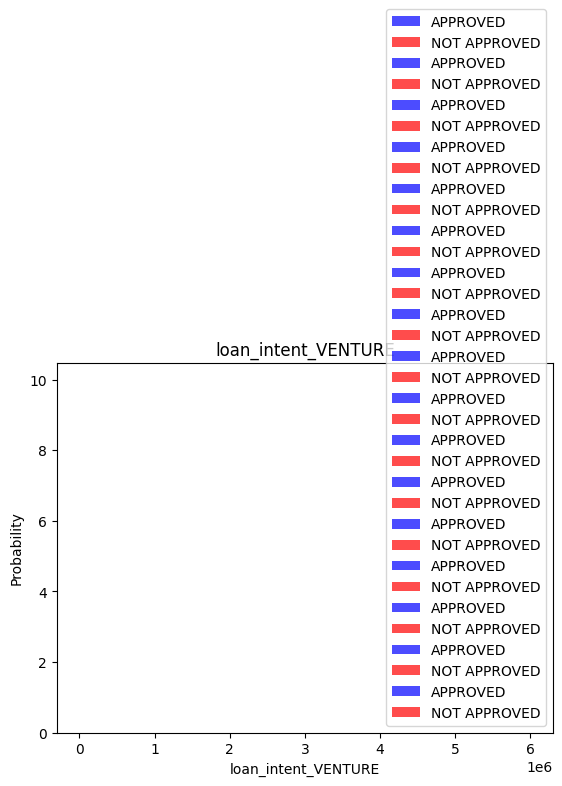

In [ ]:
clms = df.columns
for label in clms[:-1]:
  plt.hist(df[df["loan_status"]==1][label], color='blue', label='APPROVED', alpha=0.7, density=True)
  plt.hist(df[df["loan_status"]==0][label], color='red', label='NOT APPROVED', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  # plt.show()

In [ ]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data, X, y

In [ ]:
train , X_train, y_train = scale_dataset(train,False) #True
valid , X_valid, y_valid = scale_dataset(valid,False)
test , X_test, y_test = scale_dataset(test,False)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      5160
           1       0.76      0.15      0.26      1357

    accuracy                           0.81      6517
   macro avg       0.79      0.57      0.57      6517
weighted avg       0.80      0.81      0.76      6517

